# Loan Classification

We want to create a little portfolio exercice where we will determine if a person is likely to pay back their loan or not.

To do so we will be using the dataset of the LendingClub on Kaggle ([here](https://www.kaggle.com/wordsforthewise/lending-club)).

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal

Our objective is to build a model that can predict whether or not a borrower will pay back their loan based on historical data on the loans given out with the information on whether or not the borrower defaulted (charge-off). Then we want to be able to input a new potential customer and see if he is likely to pay back his loan.

Keep in mind classification metrics when evaluating the performance of your model!

The `loan_status` column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# Step 1: EDA

We know that we are working with a classification problem. However we do not know yet how many categories are present. Let's first determine what our data looks like and what we can think of for ETA and Feature Engineering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
sns.set_theme(palette='Set2')

In [2]:
df = pd.read_csv('data/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

I wanted to have an idea of what one line of data would look like.

After having a look at the feature description, here is my first impression (might change later on):
- `term`: is a duration saved as a string. It might be interesting to convert the strings to an integer with a fixed unit of measure (ex: months)
- `grade`: seems to be a categorical feature. We could think of creating `dummy_values` depending on how many there are and on their impact on the label
- `emp_title`: is the name of a job. This should have no impact on paying back the loan. To be dropped
- `emp_lenght`: duration saved as a string. It might be interesting to convert the strings to an integer with a fixed unit of measure (ex: months)
- `home_ownership`: categorical feature. Again we can think of `dummy_values`
- `issue_d`: date saved as string. `df['date'] = pd.to_datetime(df['issue_d'])`.
- `purpose`: another category
- `title`: to be dropped
- `earliest_cr_line`: `df['date'] = pd.to_datetime(df['earliest_cr_line'])`.
- `initial_list_status`: category
- `application_type`: category
- `address`: to be dropped

In [3]:
df.iloc[1]

loan_amnt                                                        8000.0
term                                                          36 months
int_rate                                                          11.99
installment                                                      265.68
grade                                                                 B
sub_grade                                                            B5
emp_title                                               Credit analyst 
emp_length                                                      4 years
home_ownership                                                 MORTGAGE
annual_inc                                                      65000.0
verification_status                                        Not Verified
issue_d                                                        Jan-2015
loan_status                                                  Fully Paid
purpose                                              debt_consol

### 1. Distribution of the target label

<AxesSubplot:xlabel='loan_status', ylabel='count'>

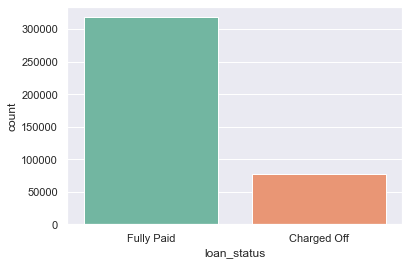

In [4]:
sns.countplot(x='loan_status', data=df)

We can see that there are significantly more `Fully Paid` values than `Charged Off`. This is normal, but we might keep the proportion in mind when training our model.

#### Converting our label

We want to replace `Fully Paid` by `1` and `Charged Off` by `0`.

In [23]:
# loan_status = df['loan_status'].apply(lambda x: 1 if 'fully paid' in x.lower() else 0)
loan_status = df['loan_status'].map(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

### 2. Correlation between continous features

<AxesSubplot:>

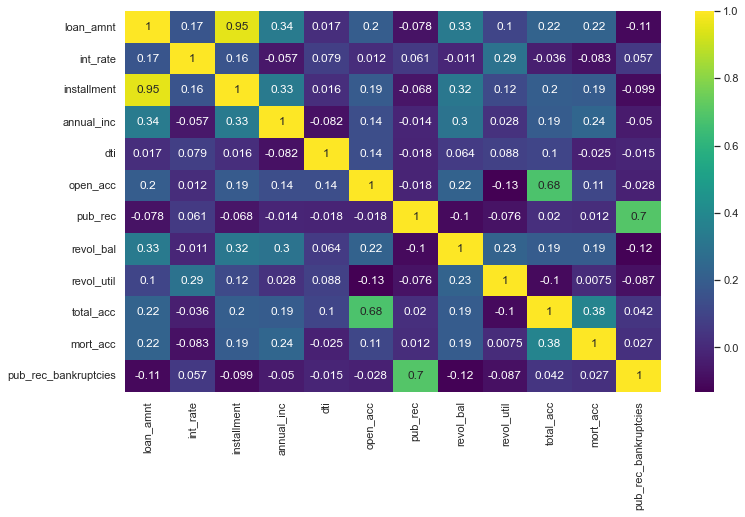

In [6]:
correlation = df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(data=correlation, annot=True, cmap='viridis')

We can notice a very high correlation between the `loan_amnt` and the `installment` features.

We want to be sure that this feature is not a perfect predictor of our label which is why we will explore this a little further:<br/>The `installment` is the _monthly payment owed by the borrower **if** the loan originates_.<br/>The `loan_amnt` is the listed amount of the loan applied for by the borrower.

It makes sence that both features are highly correlated since they must be linked by some kind of formula. This means that we shouldn't consider the two features as duplicates, and that their correlation can be visualized with a **scatterplot**.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

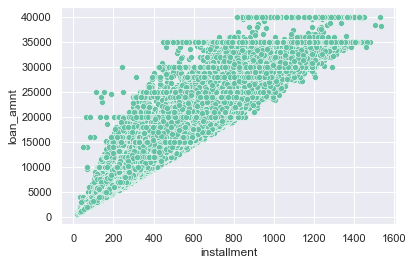

In [7]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

### 3. Correlation between the main feature and the label

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

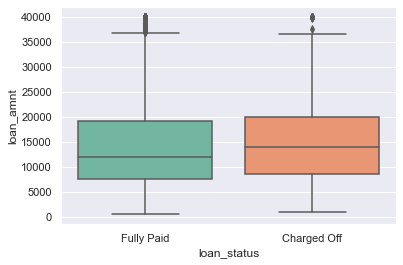

In [8]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

As main feature, I chose the loan amount. The rationale behind this is: if you need to pay off more, there is a higher chance that you won't be able to pay back.

As we can see, it is pretty well balanced, charged off loans are generally slightly higher in amount, but it is nothing drastic.

In [9]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### 4. Categorical features

#### 4.1 Grade and SubGrade

What are the possibilities ?<br/>For better clarity, I'll re-order the grades alphabetically.

In [10]:
np.sort(df['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [12]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

We can see that the `sub_grade` contains the information of the `grade` feature.

Now is there a correlation between the grade and paying of your loan?

<AxesSubplot:xlabel='grade', ylabel='count'>

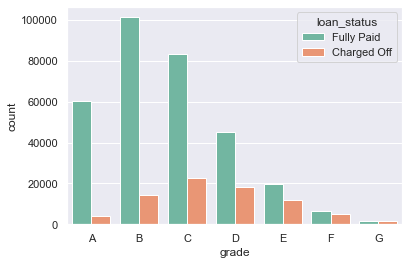

In [13]:
sns.countplot(x='grade', data=df, hue='loan_status', order=np.sort(df['grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

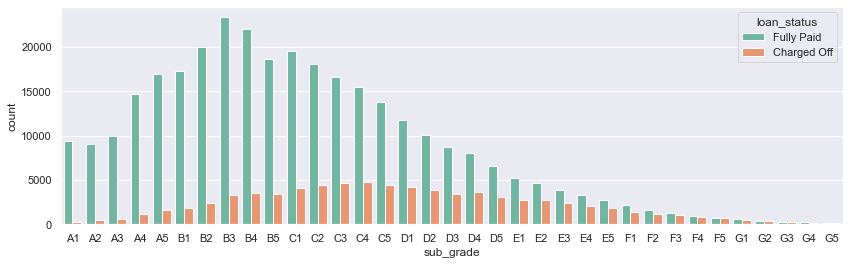

In [14]:
plt.figure(figsize=(14, 4))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=np.sort(df['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

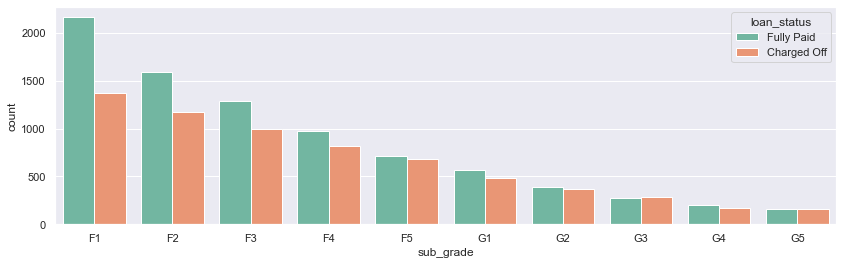

In [15]:
zoom_f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(14, 4))
sns.countplot(
    x='sub_grade', 
    data=zoom_f_and_g, 
    hue='loan_status', 
    order=sorted(zoom_f_and_g['sub_grade'].unique())
)

In [16]:
grade_status = df.groupby('grade')['loan_status'].value_counts().unstack(level=1)

In [21]:
grade_status['Total'] = grade_status['Charged Off'] + grade_status['Fully Paid']
grade_status['CO percent'] = (
    grade_status['Charged Off'] / (grade_status['Charged Off'] + grade_status['Fully Paid']) * 100
)

<AxesSubplot:xlabel='grade', ylabel='CO percent'>

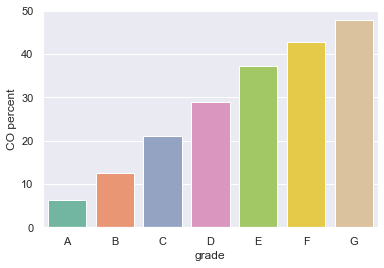

In [22]:
sns.barplot(x=grade_status.index, y='CO percent', data=grade_status)

There is a clear correlation between the grade and the ability to pay back.

#### 4.2 Home ownership

<AxesSubplot:xlabel='home_ownership', ylabel='CO percent'>

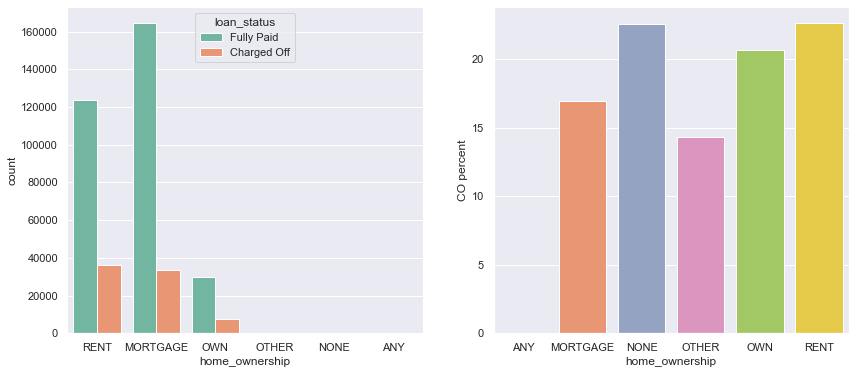

In [30]:
home_status = df.groupby('home_ownership')['loan_status'].value_counts().unstack(level=1)
home_status['CO percent'] = (
    home_status['Charged Off'] / (home_status['Charged Off'] + home_status['Fully Paid']) * 100
)

# plotting
fig, axis = plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='home_ownership', data=df, hue='loan_status', ax=axis[0])
sns.barplot(x=home_status.index, y='CO percent', data=home_status, ax=axis[1])

Home ownership does not seem to be tightly correlated with paying back one's loan.

#### 4.3 Purpose

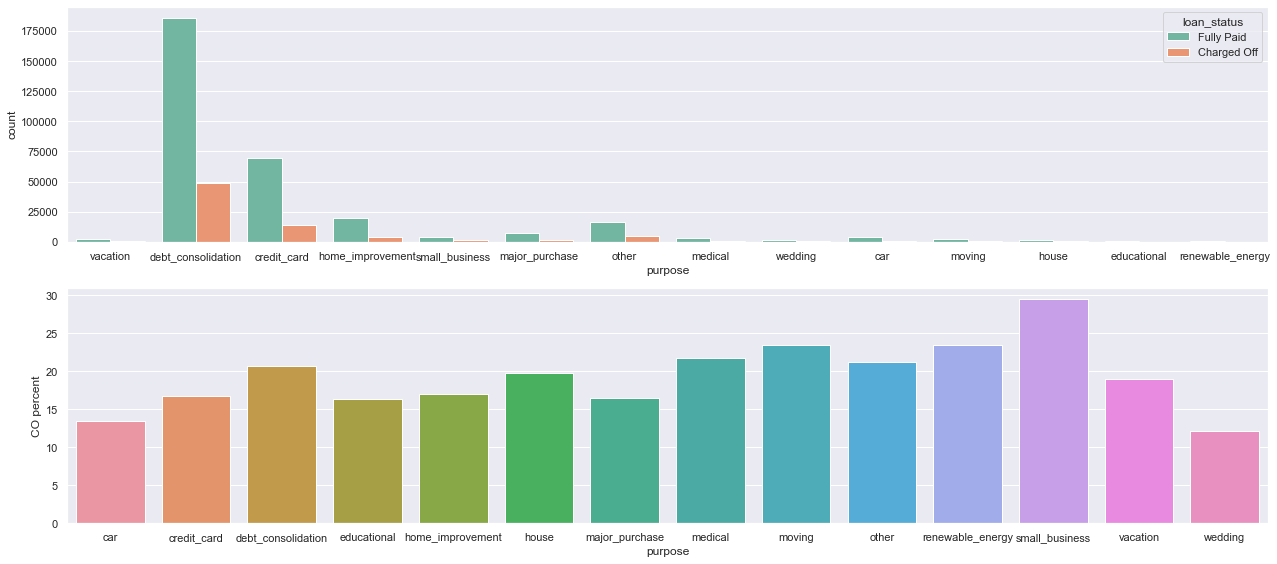

In [35]:
purpose_status = df.groupby('purpose')['loan_status'].value_counts().unstack(level=1)
purpose_status['CO percent'] = (
    purpose_status['Charged Off'] / (purpose_status['Charged Off'] + purpose_status['Fully Paid']) * 100
)

# plotting
fig, axis = plt.subplots(nrows=2, figsize=(18, 8))
sns.countplot(x='purpose', data=df, hue='loan_status', ax=axis[0])
sns.barplot(x=purpose_status.index, y='CO percent', data=purpose_status, ax=axis[1])
plt.tight_layout()

The purpose does not seem to be tightly correlated with paying back one's loan.

#### 4.4 Initial listing status

<AxesSubplot:xlabel='initial_list_status', ylabel='CO percent'>

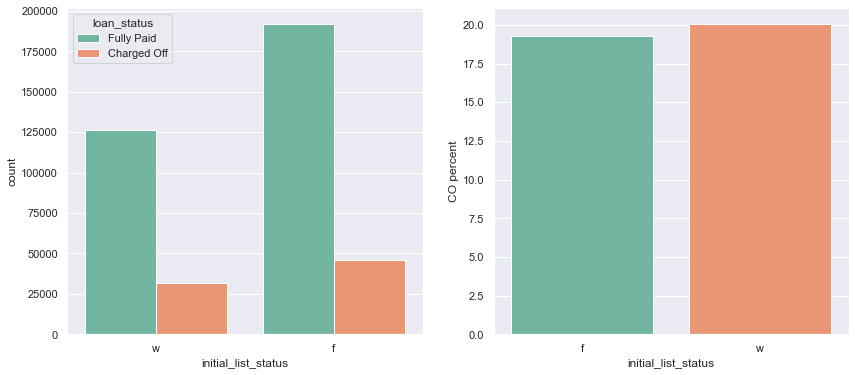

In [36]:
listing_status = df.groupby('initial_list_status')['loan_status'].value_counts().unstack(level=1)
listing_status['CO percent'] = (
    listing_status['Charged Off'] / (listing_status['Charged Off'] + listing_status['Fully Paid']) * 100
)

# plotting
fig, axis = plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='initial_list_status', data=df, hue='loan_status', ax=axis[0])
sns.barplot(x=listing_status.index, y='CO percent', data=listing_status, ax=axis[1])

The initial listing status does not seem to be tightly correlated with paying back one's loan.

#### 4.5 Application type

<AxesSubplot:xlabel='application_type', ylabel='CO percent'>

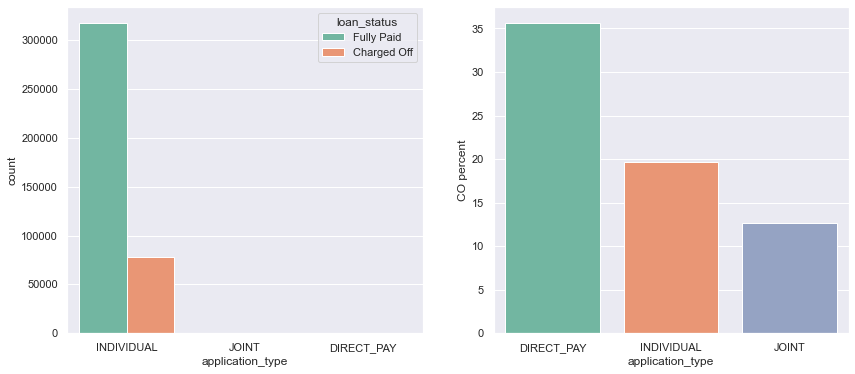

In [37]:
application_status = df.groupby('application_type')['loan_status'].value_counts().unstack(level=1)
application_status['CO percent'] = (
    application_status['Charged Off'] / (application_status['Charged Off'] + application_status['Fully Paid']) * 100
)

# plotting
fig, axis = plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='application_type', data=df, hue='loan_status', ax=axis[0])
sns.barplot(x=application_status.index, y='CO percent', data=application_status, ax=axis[1])

We can see that the application type has a higher correlation with the loan status. It seems more likely that data point with the category `DIRECT_PAY` will be Charged Off.<br/>Then the `INDIVIDUAL` and  finally `JOINT` is less likely to be charged off.

#### 4.6 Verification status

<AxesSubplot:xlabel='verification_status', ylabel='CO percent'>

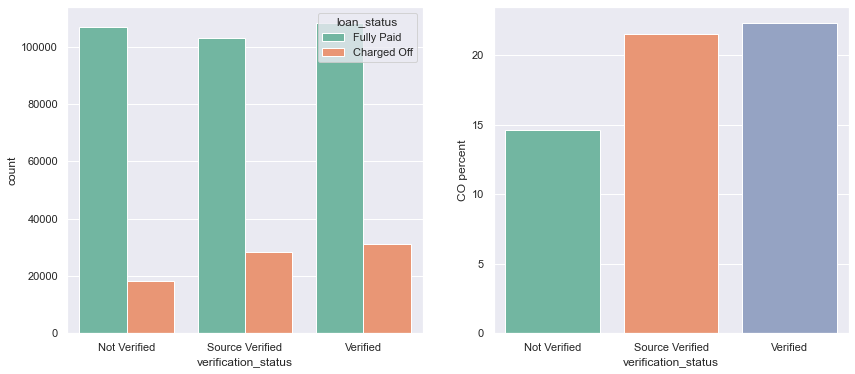

In [38]:
verif_status = df.groupby('verification_status')['loan_status'].value_counts().unstack(level=1)
verif_status['CO percent'] = (
    verif_status['Charged Off'] / (verif_status['Charged Off'] + verif_status['Fully Paid']) * 100
)

# plotting
fig, axis = plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='verification_status', data=df, hue='loan_status', ax=axis[0])
sns.barplot(x=verif_status.index, y='CO percent', data=verif_status, ax=axis[1])

There doesn't seem to be a big correlation between the verification status of a data point and the loan status.

#### Conclusion

Most categories are not highly correlated with the loan status. 

While it is easy to apply a numerical value to binary categories (initial listing status), I am wondering whether or not it is a good idea to create *dummy values* for the other categories. I'm afraid that I would needlesly extend my data structure and hinder the training of my model.

Since I have no other idea of how to use this data, I will `get_dummies` from the categories. However:
- I will only use the `sub_grade` since it contains our `grade` information already. This way I will prevent duplicating data.
- We will need to keep in mind that, since our model will be composed of many columns, there is a higher probability that all "possibilities" are not covered by our model's training data. This problem is usually minimized by having a large dataset. Let's hope ours is large enough.

### 5. Correlation between the label and the numeric features

In paragraph 1, I created a variable called `loan_status`. I will now create a new column from this variable and check which numerical features are correlated to the label.

On the graph below, everything that is negative shows what can make *not paying* back a loan more likely and everything that is positive shows what makes *paying* back a loan more likely.

<AxesSubplot:>

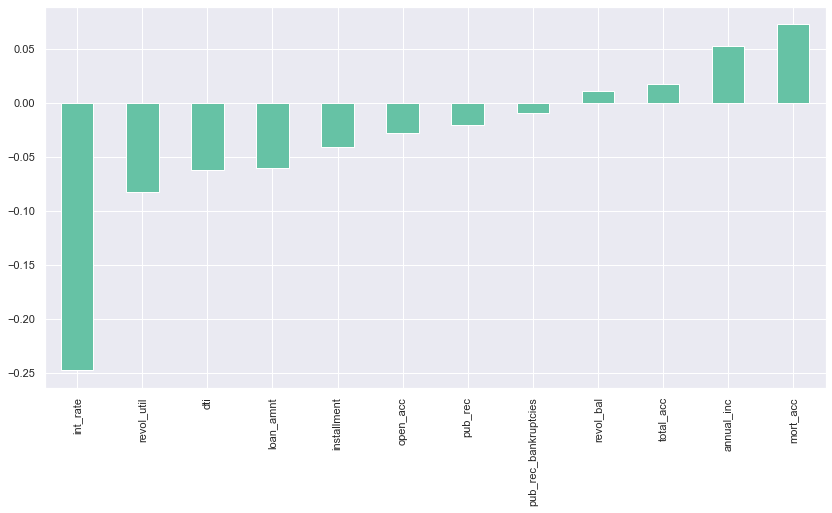

In [45]:
df['loan_repaid'] = loan_status

plt.figure(figsize=(14, 7))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

This shows that the interest rate has the highest negative correlation with repaying a loan. This makes sens as the higher your interest rate, the more likely it is that it becomes hard to repay the loan.

In [17]:
df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 1 if x.lower() == 'w' else 0)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

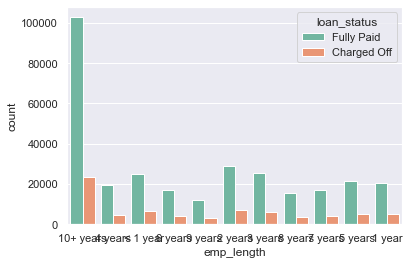

In [19]:
sns.countplot(x="emp_length", data=df, hue="loan_status")

## Step 2: Feature Engineering

### 1. Missing Data

First let's verify if there is any *null* data:

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

There seem to be a few features with missing data. As a reminder, we have **396 030** rows in our dataset (`len(df)`).

I now would like to identify what percentage of data is missing.

In [48]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

The missing data points of some features represent close to 10% of the total amount of data for that feature (`mort_acc`). This can not be dropped.

The missing data points of other features (`pub_rec_bankruptcies`) on the other hand represent less than half a percent of our data and wouldn't influence our training if dropped.

Let's go over the missing data in order of the list above.

**emp_title** is *«The job title supplied by the Borrower when applying for the loan.»*

In [49]:
df['emp_title'].nunique()

173105

There are 173105 unique *employment titles*. That is about half the lenght of our entire dataset. This means that, realistically, it is totally ok to drop this feature. This is what my intuition told me as I was doing the exploratory data analysis.

If I wanted to be very thorough, I could categorize these jobs by there income level limiting it to: `low_income`, `medium_income` and `high_income`.<br/>This however requires a good knowledge of the income levels of each profession and a lot of time.

In [50]:
df = df.drop('emp_title', axis=1)

**emp_lenght** is *«Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.»*

Let's see the distribution of each category and how its correlation with the `loan_status` column.

In [51]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [59]:
# Since it is not in order, let's copy-pasta
emp_lenght_order = ['< 1 year', 
 '1 year', 
 '2 years', 
 '3 years', 
 '4 years', 
 '5 years', 
 '6 years', 
 '7 years', 
 '8 years',
 '9 years', 
 '10+ years']

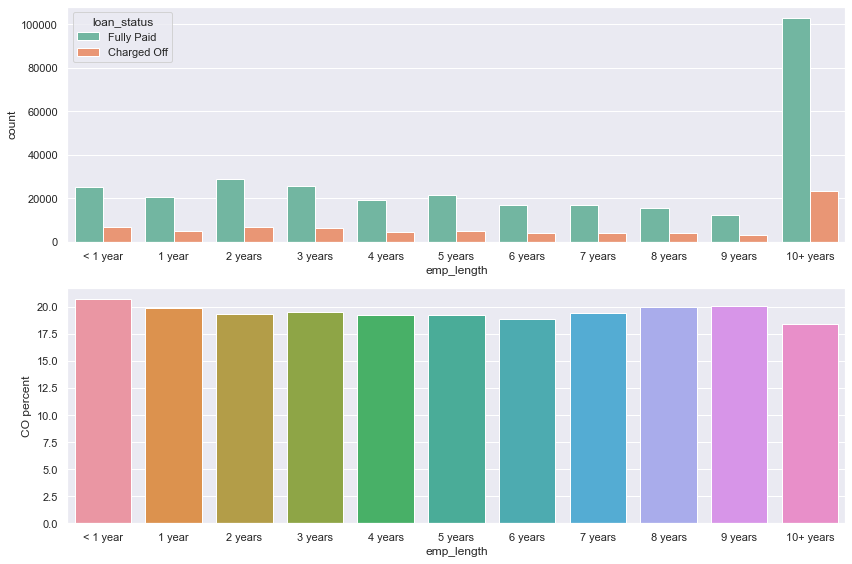

In [65]:
emp_len_status = df.groupby('emp_length')['loan_status'].value_counts().unstack(level=1)
emp_len_status['CO percent'] = (
    emp_len_status['Charged Off'] / (
        emp_len_status['Charged Off'] + emp_len_status['Fully Paid']
    ) * 100
)

# plotting
fig, axis = plt.subplots(nrows=2, figsize=(12, 8))
sns.countplot(x='emp_length', data=df, hue='loan_status', ax=axis[0], order=emp_lenght_order)
sns.barplot(x=emp_len_status.index, y='CO percent', data=emp_len_status, ax=axis[1], order=emp_lenght_order)
plt.tight_layout()

Again there is no real difference on the charge off rates accross the employment length categories. In other words regardless of their employment lenght, a person has 20% chance of not paying back.

This is why, instead of creating *dummy values* or, has I had envisioned it string parsing the yearly values, we can say **drop** this column altogether.

In [67]:
df = df.drop('emp_length', axis=1)

In [21]:
grade = pd.get_dummies(df['sub_grade'], drop_first=True)

In [22]:
home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)

In [23]:
purpose = pd.get_dummies(df['purpose'], drop_first=True)

In [24]:
application_type = pd.get_dummies(df['application_type'], drop_first=True)

In [25]:
verification_status = pd.get_dummies(df['verification_status'], drop_first=True)

In [26]:
df['term'] = df['term'].apply(lambda x: int(x.split(' months')[0]))

In [27]:
df['issue_date'] = pd.to_datetime(df['issue_d'])
df['issue_date_month'] = df['issue_date'].apply(lambda x: x.month)
df['issue_date_year'] = df['issue_date'].apply(lambda x: x.year)

In [28]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: x.month)
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: x.year)

<AxesSubplot:xlabel='issue_date_year', ylabel='count'>

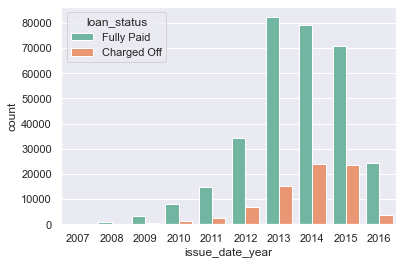

In [31]:
sns.countplot(x="issue_date_year", data=df, hue='loan_status')

In [29]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [32]:
new_data = pd.concat([df, grade, home_ownership, purpose, application_type, verification_status], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 87 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               396030 non-null  float64       
 1   term                    396030 non-null  int64         
 2   int_rate                396030 non-null  float64       
 3   installment             396030 non-null  float64       
 4   grade                   396030 non-null  object        
 5   sub_grade               396030 non-null  object        
 6   emp_length              396030 non-null  object        
 7   home_ownership          396030 non-null  object        
 8   annual_inc              396030 non-null  float64       
 9   verification_status     396030 non-null  object        
 10  issue_d                 396030 non-null  object        
 11  loan_status             396030 non-null  object        
 12  purpose                 396030

Replace Null-values by 0

In [44]:
new_data['revol_util'].max()

892.3

In [45]:
new_data = new_data[new_data['revol_util'] != new_data['revol_util'].max()]

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

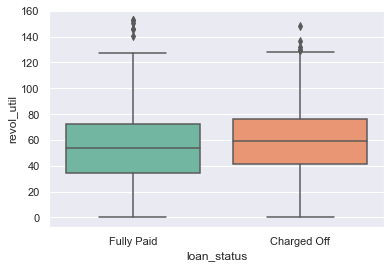

In [46]:
#plt.figure(figsize=(24, 6))
sns.boxplot(x='loan_status', data=new_data, y='revol_util')

For the remaining missing values, we are going to input a mean as to not disrupt the values.

In [51]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
label                         0
issue_date                    0
issue_date_month              0
issue_date_year               0
earliest_cr_line_month        0
earliest_cr_line_year         0
years_of_employment           0
dtype: i

In [49]:
new_data['revol_util'] = new_data['revol_util'].fillna(new_data['revol_util'].mean())

In [52]:
new_data['mort_acc'] = new_data['mort_acc'].fillna(new_data['mort_acc'].mean())

In [53]:
new_data['pub_rec_bankruptcies'] = new_data['pub_rec_bankruptcies'].fillna(new_data['pub_rec_bankruptcies'].mean())

In [54]:
final_data = new_data.drop(
    [
        'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'verification_status', 'issue_d', 'loan_status', 'purpose', 
        'earliest_cr_line', 'application_type', 'issue_date', 'address', 
        'title', 'emp_title'
    ],
    axis=1
)

## Step 3: Preprocessing the data

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [57]:
X = final_data.loc[:, final_data.columns != 'label'].values
y = final_data['label']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
# Scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Create the model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [62]:
X_train.shape

(265339, 75)

In [63]:
model = Sequential()

model.add(Dense(units=75, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=35, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2022-06-16 16:11:51.524007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 16:11:51.524198: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 16:11:51.525333: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nootaku-tuxedo): /proc/driver/nvidia/version does not exist
2022-06-16 16:11:51.530993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min', # Can be 'min', 'max' or auto - max can be usefull for accuracy monitoring
    verbose=1,
    patience=25
)

In [68]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=400,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/400
2073/2073 [==============================] - 7s 4ms/step - loss: 0.4614 - val_loss: 0.4585
Epoch 2/400
2073/2073 [==============================] - 9s 4ms/step - loss: 0.4609 - val_loss: 0.4574
Epoch 3/400
2073/2073 [==============================] - 10s 5ms/step - loss: 0.4598 - val_loss: 0.4571
Epoch 4/400
2073/2073 [==============================] - 11s 5ms/step - loss: 0.4593 - val_loss: 0.4566
Epoch 5/400
2073/2073 [==============================] - 11s 5ms/step - loss: 0.4586 - val_loss: 0.4562
Epoch 6/400
2073/2073 [==============================] - 8s 4ms/step - loss: 0.4584 - val_loss: 0.4550
Epoch 7/400
2073/2073 [==============================] - 7s 4ms/step - loss: 0.4580 - val_loss: 0.4552
Epoch 8/400
2073/2073 [==============================] - 7s 4ms/step - loss: 0.4575 - val_loss: 0.4560
Epoch 9/400
2073/2073 [==============================] - 7s 4ms/step - loss: 0.4574 - val_loss: 0.4550
Epoch 10/400
2073/2073 [==============================] - 7s 3ms/step 

In [73]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

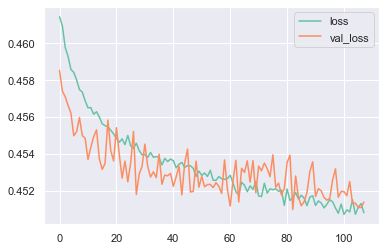

In [74]:
losses.plot()

## Errors I made

### Keeping everything

I made the mistake of wanting to keep everything and not dropping any feature. This was especially true with the `emp_lenght` column that I over-engineered as follows:

In [30]:
df['emp_length'] = df['emp_length'].fillna("0 years")
df['years_of_employment'] = df['emp_length'].apply(lambda x: x.split(" ")[0])
df['years_of_employment'] = df['years_of_employment'].apply(lambda x: 0 if x == "<" else (10 if x== "10+" else int(x)))